In [10]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas as pd
rng = numpy.random

In [60]:
import time

In [53]:
# Parameters
learning_rate = 0.05
training_epochs = 10000
display_step = 50

In [54]:
# Training Data
data=pd.read_csv('data.csv',names=['x','y'])
train_X=data['x']
train_Y=data['y']
n_samples = train_X.shape[0]

In [55]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(0., name="weight")
b = tf.Variable(0., name="bias")

In [56]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [57]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [58]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 275.452301025 W= 8.176332 b= 35.04475
Epoch: 0100 cost= 117.728004456 W= 2.9689596 b= 53.918713
Epoch: 0150 cost= 55.583194733 W= -0.29944295 b= 65.76491
Epoch: 0200 cost= 31.095712662 W= -2.3507671 b= 73.19988
Epoch: 0250 cost= 21.444692612 W= -3.6382697 b= 77.86639
Epoch: 0300 cost= 17.639459610 W= -4.4465055 b= 80.795784
Epoch: 0350 cost= 16.139242172 W= -4.9536176 b= 82.633766
Epoch: 0400 cost= 15.546925545 W= -5.271992 b= 83.78775
Epoch: 0450 cost= 15.313016891 W= -5.4717474 b= 84.51172
Epoch: 0500 cost= 15.220394135 W= -5.5971694 b= 84.96629
Epoch: 0550 cost= 15.183636665 W= -5.6758986 b= 85.251625
Epoch: 0600 cost= 15.168948174 W= -5.7253566 b= 85.43096
Epoch: 0650 cost= 15.163120270 W= -5.7563443 b= 85.54314
Epoch: 0700 cost= 15.160697937 W= -5.7757845 b= 85.613754
Epoch: 0750 cost= 15.159728050 W= -5.7880836 b= 85.65827
Epoch: 0800 cost= 15.159275055 W= -5.7961984 b= 85.687775
Epoch: 0850 cost= 15.159148216 W= -5.800826 b= 85.70439
Epoch: 0900 cost= 15.159077

Epoch: 7150 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7200 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7250 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7300 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7350 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7400 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7450 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7500 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7550 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7600 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7650 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7700 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7750 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7800 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7850 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7900 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 7950 cost= 15.158966064 W= -5.8091764 b= 85.734764
Epoch: 8000 co

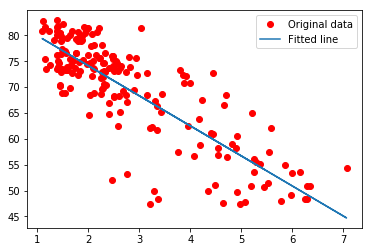

In [61]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    start=time.time()

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    end=time.time()-start
    print('Training completed in {:.0f}m {:.0f}s'.format(end//60,end%60))
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()